# **Bioinformatics Project - Computational Drug Discovery [Part 5] Comparing Regressors**

Based on the work of Chanin Nantasenamat [*'Data Professor' YouTube channel*](http://youtube.com/dataprofessor)



## **1. Import libraries**

In [1]:
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split

import lazypredict
from lazypredict.Supervised import LazyRegressor

## **2. Load the data set**


In [3]:
#! wget https://github.com/dataprofessor/data/raw/master/acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv

--2021-01-22 14:57:46--  https://github.com/dataprofessor/data/raw/master/acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv
Resolving github.com (github.com)... 192.30.255.112
Connecting to github.com (github.com)|192.30.255.112|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dataprofessor/data/master/acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv [following]
--2021-01-22 14:57:46--  https://raw.githubusercontent.com/dataprofessor/data/master/acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8363909 (8.0M) [text/plain]
Saving to: ‘acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_f

In [14]:
df = pd.read_csv('/Users/damaro/Documents/Bioinformatics/HSC70_bioactivity_data_3class_pIC50_pubchem_fp.csv')

In [15]:
df.head()

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.98
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,3.00
2,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,3.00
3,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,3.00
4,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,3.00


In [28]:
X = df.drop('pIC50', axis=1)
Y = df.pIC50

## **3. Data pre-processing**

In [29]:
# Examine X dimension
X.shape

(92, 881)

In [30]:
Y.shape

(92,)

In [31]:
# Remove low variance features
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))    
X = selection.fit_transform(X)
X.shape

(92, 139)

In [32]:
# Perform data splitting using 80/20 ratio
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

## **4. Compare ML algorithms**

In [33]:
# Defines and builds the lazyclassifier
clf = LazyRegressor(verbose=1,ignore_warnings=True, custom_metric=None)
models_train,predictions_train = clf.fit(X_train, X_train, Y_train, Y_train)
models_test,predictions_test = clf.fit(X_train, X_test, Y_train, Y_test)

  0%|          | 0/42 [00:00<?, ?it/s]

{'Model': 'AdaBoostRegressor', 'R-Squared': 0.823623077274724, 'Adjusted R-Squared': 1.1895393796450728, 'RMSE': 0.45160487054658444, 'Time taken': 0.052516937255859375}
{'Model': 'BaggingRegressor', 'R-Squared': 0.8320379181194874, 'Adjusted R-Squared': 1.180496565602939, 'RMSE': 0.44070031516521047, 'Time taken': 0.015279769897460938}


  7%|▋         | 3/42 [00:00<00:07,  4.89it/s]

{'Model': 'BayesianRidge', 'R-Squared': 0.555691073506945, 'Adjusted R-Squared': 1.4774663090671636, 'RMSE': 0.7167707195726364, 'Time taken': 0.5452427864074707}
{'Model': 'DecisionTreeRegressor', 'R-Squared': 0.9319639384985079, 'Adjusted R-Squared': 1.0731133795239916, 'RMSE': 0.2804835006385193, 'Time taken': 0.013416051864624023}
{'Model': 'DummyRegressor', 'R-Squared': 0.0, 'Adjusted R-Squared': 2.074626865671642, 'RMSE': 1.0753200326717847, 'Time taken': 0.005731821060180664}
{'Model': 'ElasticNet', 'R-Squared': 0.004209185445473995, 'Adjusted R-Squared': 2.0701035619093413, 'RMSE': 1.073054535468005, 'Time taken': 0.06100296974182129}


 19%|█▉        | 8/42 [00:01<00:07,  4.38it/s]

{'Model': 'ElasticNetCV', 'R-Squared': 0.2967780352136403, 'Adjusted R-Squared': 1.7557012158898193, 'RMSE': 0.9017454303682415, 'Time taken': 1.0175881385803223}
{'Model': 'ExtraTreeRegressor', 'R-Squared': 0.9319639384985079, 'Adjusted R-Squared': 1.0731133795239916, 'RMSE': 0.2804835006385193, 'Time taken': 0.012410879135131836}


 21%|██▏       | 9/42 [00:02<00:07,  4.69it/s]

{'Model': 'ExtraTreesRegressor', 'R-Squared': 0.9319639384985079, 'Adjusted R-Squared': 1.0731133795239916, 'RMSE': 0.2804835006385193, 'Time taken': 0.12449097633361816}
{'Model': 'GammaRegressor', 'R-Squared': 0.6305265668602452, 'Adjusted R-Squared': 1.3970460774039155, 'RMSE': 0.653626038105392, 'Time taken': 0.03912925720214844}


 26%|██▌       | 11/42 [00:02<00:05,  5.21it/s]

{'Model': 'GaussianProcessRegressor', 'R-Squared': 0.9319639384984464, 'Adjusted R-Squared': 1.0731133795240577, 'RMSE': 0.2804835006386461, 'Time taken': 0.2750437259674072}
{'Model': 'GradientBoostingRegressor', 'R-Squared': 0.929666336606794, 'Adjusted R-Squared': 1.0755824442434452, 'RMSE': 0.28518019121840793, 'Time taken': 0.06130695343017578}


 31%|███       | 13/42 [00:02<00:05,  5.61it/s]

{'Model': 'HistGradientBoostingRegressor', 'R-Squared': 0.6209174795133358, 'Adjusted R-Squared': 1.4073722608214898, 'RMSE': 0.6620710777294789, 'Time taken': 0.24398183822631836}
{'Model': 'HuberRegressor', 'R-Squared': 0.8746506522405914, 'Adjusted R-Squared': 1.1347037766966779, 'RMSE': 0.3807139372274167, 'Time taken': 0.03493785858154297}
{'Model': 'KNeighborsRegressor', 'R-Squared': 0.4881242862647943, 'Adjusted R-Squared': 1.5500753938646987, 'RMSE': 0.7693429862937883, 'Time taken': 0.01702594757080078}


 40%|████      | 17/42 [00:03<00:04,  6.15it/s]

{'Model': 'KernelRidge', 'R-Squared': -12.940940293817489, 'Adjusted R-Squared': 15.981308972460585, 'RMSE': 4.014983549291441, 'Time taken': 0.32520389556884766}
{'Model': 'Lars', 'R-Squared': -3.430744302535657e+51, 'Adjusted R-Squared': 3.686769996754735e+51, 'RMSE': 6.29842427045704e+25, 'Time taken': 0.188079833984375}


 45%|████▌     | 19/42 [00:03<00:03,  7.18it/s]

{'Model': 'LarsCV', 'R-Squared': 0.2423060160603432, 'Adjusted R-Squared': 1.8142383110993325, 'RMSE': 0.9360189819008139, 'Time taken': 0.08547019958496094}
{'Model': 'Lasso', 'R-Squared': 0.0, 'Adjusted R-Squared': 2.074626865671642, 'RMSE': 1.0753200326717847, 'Time taken': 0.0961298942565918}


 48%|████▊     | 20/42 [00:04<00:07,  2.94it/s]

{'Model': 'LassoCV', 'R-Squared': 0.3371203093146493, 'Adjusted R-Squared': 1.7123483243185857, 'RMSE': 0.8754978687762388, 'Time taken': 1.1678779125213623}
{'Model': 'LassoLars', 'R-Squared': 0.0, 'Adjusted R-Squared': 2.074626865671642, 'RMSE': 1.0753200326717847, 'Time taken': 0.06376075744628906}


 52%|█████▏    | 22/42 [00:04<00:05,  3.81it/s]

{'Model': 'LassoLarsCV', 'R-Squared': 0.3274084138187081, 'Adjusted R-Squared': 1.7227849881351196, 'RMSE': 0.8818880376358675, 'Time taken': 0.17171406745910645}


 57%|█████▋    | 24/42 [00:05<00:04,  4.34it/s]

{'Model': 'LinearRegression', 'R-Squared': 0.930356953503846, 'Adjusted R-Squared': 1.0748402887719863, 'RMSE': 0.28377662350525157, 'Time taken': 0.31205010414123535}
{'Model': 'LinearSVR', 'R-Squared': 0.8686368573505606, 'Adjusted R-Squared': 1.1411663622501438, 'RMSE': 0.38973956977480595, 'Time taken': 0.0791921615600586}


 74%|███████▍  | 31/42 [00:05<00:01,  9.36it/s]

{'Model': 'MLPRegressor', 'R-Squared': 0.9272260599089637, 'Adjusted R-Squared': 1.0782048311426062, 'RMSE': 0.2900852729009471, 'Time taken': 0.22990107536315918}
{'Model': 'NuSVR', 'R-Squared': 0.6296241886787675, 'Adjusted R-Squared': 1.3980157972407274, 'RMSE': 0.6544237384656212, 'Time taken': 0.014842033386230469}
{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': 0.6687880896370437, 'Adjusted R-Squared': 1.3559292171064605, 'RMSE': 0.6188575723834264, 'Time taken': 0.005419015884399414}
{'Model': 'OrthogonalMatchingPursuitCV', 'R-Squared': 0.3795028839538429, 'Adjusted R-Squared': 1.666802870974975, 'RMSE': 0.8470472176242413, 'Time taken': 0.012550830841064453}
{'Model': 'PassiveAggressiveRegressor', 'R-Squared': 0.644974236302395, 'Adjusted R-Squared': 1.3815202236750381, 'RMSE': 0.6407191016343123, 'Time taken': 0.011835098266601562}
{'Model': 'PoissonRegressor', 'R-Squared': 0.8147481531584135, 'Adjusted R-Squared': 1.199076611531257, 'RMSE': 0.4628273444422784, 'Time taken

 81%|████████  | 34/42 [00:05<00:00, 11.01it/s]

{'Model': 'RandomForestRegressor', 'R-Squared': 0.8529776814441614, 'Adjusted R-Squared': 1.1579941333734385, 'RMSE': 0.41231522361162276, 'Time taken': 0.14429998397827148}
{'Model': 'Ridge', 'R-Squared': 0.9224072872425687, 'Adjusted R-Squared': 1.0833832137094783, 'RMSE': 0.2995354334035435, 'Time taken': 0.1781141757965088}


 86%|████████▌ | 36/42 [00:06<00:00,  8.08it/s]

{'Model': 'RidgeCV', 'R-Squared': 0.8392725164035546, 'Adjusted R-Squared': 1.1727220719245384, 'RMSE': 0.4311047511822474, 'Time taken': 0.2684040069580078}
{'Model': 'SGDRegressor', 'R-Squared': 0.8187130094960369, 'Adjusted R-Squared': 1.1948158703923186, 'RMSE': 0.4578477204841937, 'Time taken': 0.04115629196166992}
{'Model': 'SVR', 'R-Squared': 0.6442552236069816, 'Adjusted R-Squared': 1.3822928940342885, 'RMSE': 0.64136757873321, 'Time taken': 0.010212898254394531}


 93%|█████████▎| 39/42 [00:06<00:00,  8.38it/s]

{'Model': 'TransformedTargetRegressor', 'R-Squared': 0.930356953503846, 'Adjusted R-Squared': 1.0748402887719863, 'RMSE': 0.28377662350525157, 'Time taken': 0.2572169303894043}
{'Model': 'TweedieRegressor', 'R-Squared': 0.6344071931202846, 'Adjusted R-Squared': 1.3928758521692464, 'RMSE': 0.6501844187818384, 'Time taken': 0.2549629211425781}


100%|██████████| 42/42 [00:07<00:00,  5.87it/s]


{'Model': 'XGBRegressor', 'R-Squared': 0.9319614819140644, 'Adjusted R-Squared': 1.0731160194356324, 'RMSE': 0.2804885643148222, 'Time taken': 0.2795581817626953}
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000833 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 315
[LightGBM] [Info] Number of data points in the train set: 73, number of used features: 105
[LightGBM] [Info] Start training from score 4.003795
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

  0%|          | 0/42 [00:00<?, ?it/s]

{'Model': 'AdaBoostRegressor', 'R-Squared': 0.6318462826717491, 'Adjusted R-Squared': 1.0547666686934587, 'RMSE': 0.7061458394603597, 'Time taken': 0.033872127532958984}
{'Model': 'BaggingRegressor', 'R-Squared': 0.6315181450933103, 'Adjusted R-Squared': 1.0548154825481026, 'RMSE': 0.70646046534364, 'Time taken': 0.014058828353881836}


  7%|▋         | 3/42 [00:00<00:04,  8.71it/s]

{'Model': 'BayesianRidge', 'R-Squared': 0.28830930551561096, 'Adjusted R-Squared': 1.1058713429811489, 'RMSE': 0.9818054834186868, 'Time taken': 0.29587674140930176}
{'Model': 'DecisionTreeRegressor', 'R-Squared': 0.06826470403657048, 'Adjusted R-Squared': 1.138605250639188, 'RMSE': 1.1233784371764763, 'Time taken': 0.011986017227172852}
{'Model': 'DummyRegressor', 'R-Squared': -0.00046797109036900153, 'Adjusted R-Squared': 1.1488299461126168, 'RMSE': 1.164076185251171, 'Time taken': 0.003253936767578125}
{'Model': 'ElasticNet', 'R-Squared': 0.0032346005846097814, 'Adjusted R-Squared': 1.1482791503262564, 'RMSE': 1.1619201588932555, 'Time taken': 0.03129887580871582}


 21%|██▏       | 9/42 [00:01<00:05,  6.02it/s]

{'Model': 'ElasticNetCV', 'R-Squared': 0.225794721609904, 'Adjusted R-Squared': 1.11517103314894, 'RMSE': 1.0240186671625036, 'Time taken': 0.9985730648040771}
{'Model': 'ExtraTreeRegressor', 'R-Squared': 0.06826470403657048, 'Adjusted R-Squared': 1.138605250639188, 'RMSE': 1.1233784371764763, 'Time taken': 0.011958122253417969}
{'Model': 'ExtraTreesRegressor', 'R-Squared': 0.06927036332064596, 'Adjusted R-Squared': 1.1384556484316395, 'RMSE': 1.122772019792305, 'Time taken': 0.12746191024780273}


 24%|██▍       | 10/42 [00:01<00:05,  5.78it/s]

{'Model': 'GammaRegressor', 'R-Squared': 0.3272951536862755, 'Adjusted R-Squared': 1.100071795319397, 'RMSE': 0.9545355066908087, 'Time taken': 0.20338988304138184}


 26%|██▌       | 11/42 [00:02<00:06,  5.11it/s]

{'Model': 'GaussianProcessRegressor', 'R-Squared': -7.008950749428401, 'Adjusted R-Squared': 2.1914141610719935, 'RMSE': 3.2935754828199504, 'Time taken': 0.2761101722717285}
{'Model': 'GradientBoostingRegressor', 'R-Squared': 0.5369362678779417, 'Adjusted R-Squared': 1.0688855138693971, 'RMSE': 0.7919544318249359, 'Time taken': 0.08632874488830566}


 31%|███       | 13/42 [00:02<00:05,  5.63it/s]

{'Model': 'HistGradientBoostingRegressor', 'R-Squared': 0.34371945209125887, 'Adjusted R-Squared': 1.0976285112591515, 'RMSE': 0.9428108583264713, 'Time taken': 0.2058560848236084}
{'Model': 'HuberRegressor', 'R-Squared': -0.24704376690831187, 'Adjusted R-Squared': 1.185510643011154, 'RMSE': 1.2996327824464702, 'Time taken': 0.024723291397094727}
{'Model': 'KNeighborsRegressor', 'R-Squared': 0.21074382131674774, 'Adjusted R-Squared': 1.117410010052054, 'RMSE': 1.0339244483830217, 'Time taken': 0.03104400634765625}


 38%|███▊      | 16/42 [00:02<00:03,  7.04it/s]

{'Model': 'KernelRidge', 'R-Squared': -11.43496233318743, 'Adjusted R-Squared': 2.849829107416312, 'RMSE': 4.103949865061902, 'Time taken': 0.23749017715454102}


 45%|████▌     | 19/42 [00:03<00:03,  7.19it/s]

{'Model': 'Lars', 'R-Squared': -4.023747506453518e+78, 'Adjusted R-Squared': 5.985740092244903e+77, 'RMSE': 2.334506943126214e+39, 'Time taken': 0.2684359550476074}
{'Model': 'LarsCV', 'R-Squared': 0.18876972854056784, 'Adjusted R-Squared': 1.1206788833576016, 'RMSE': 1.0482186531348132, 'Time taken': 0.08085298538208008}
{'Model': 'Lasso', 'R-Squared': -0.00046797109036900153, 'Adjusted R-Squared': 1.1488299461126168, 'RMSE': 1.164076185251171, 'Time taken': 0.0945899486541748}


 48%|████▊     | 20/42 [00:04<00:07,  2.96it/s]

{'Model': 'LassoCV', 'R-Squared': 0.24614447244648285, 'Adjusted R-Squared': 1.1121437974873, 'RMSE': 1.010471040559419, 'Time taken': 1.1582989692687988}
{'Model': 'LassoLars', 'R-Squared': -0.00046797109036900153, 'Adjusted R-Squared': 1.1488299461126168, 'RMSE': 1.164076185251171, 'Time taken': 0.03095698356628418}


 52%|█████▏    | 22/42 [00:04<00:05,  3.76it/s]

{'Model': 'LassoLarsCV', 'R-Squared': 0.23855972216609334, 'Adjusted R-Squared': 1.1132721074463663, 'RMSE': 1.0155416335078686, 'Time taken': 0.23791217803955078}


 57%|█████▋    | 24/42 [00:04<00:04,  4.49it/s]

{'Model': 'LinearRegression', 'R-Squared': -1.722355405389153e+24, 'Adjusted R-Squared': 2.5621815947937814e+23, 'RMSE': 1527359237306.7466, 'Time taken': 0.25996994972229004}
{'Model': 'LinearSVR', 'R-Squared': -0.8064223202468899, 'Adjusted R-Squared': 1.2687239815243307, 'RMSE': 1.5641898197286455, 'Time taken': 0.03644204139709473}


 74%|███████▍  | 31/42 [00:05<00:01,  7.46it/s]

{'Model': 'MLPRegressor', 'R-Squared': -0.09189864568592876, 'Adjusted R-Squared': 1.1624312034904687, 'RMSE': 1.21610471780935, 'Time taken': 0.5774550437927246}
{'Model': 'NuSVR', 'R-Squared': 0.4041058994724336, 'Adjusted R-Squared': 1.088645403384266, 'RMSE': 0.8983888486500156, 'Time taken': 0.012942075729370117}
{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': 0.2774652495994331, 'Adjusted R-Squared': 1.1074845083240512, 'RMSE': 0.9892571077489108, 'Time taken': 0.01749420166015625}
{'Model': 'OrthogonalMatchingPursuitCV', 'R-Squared': 0.22781136452117, 'Adjusted R-Squared': 1.1148710366828012, 'RMSE': 1.0226841202577468, 'Time taken': 0.011982917785644531}
{'Model': 'PassiveAggressiveRegressor', 'R-Squared': -0.2513623932976772, 'Adjusted R-Squared': 1.186153083300481, 'RMSE': 1.301881210975722, 'Time taken': 0.0042171478271484375}
{'Model': 'PoissonRegressor', 'R-Squared': 0.3373759614088123, 'Adjusted R-Squared': 1.098572171030094, 'RMSE': 0.9473564213614418, 'Time taken': 

 81%|████████  | 34/42 [00:05<00:00,  9.32it/s]

{'Model': 'RandomForestRegressor', 'R-Squared': 0.6314025783444995, 'Adjusted R-Squared': 1.0548326742958596, 'RMSE': 0.7065712400502118, 'Time taken': 0.12586402893066406}
{'Model': 'Ridge', 'R-Squared': -0.07387844301894919, 'Adjusted R-Squared': 1.159750512184637, 'RMSE': 1.2060279474000497, 'Time taken': 0.1230320930480957}


 86%|████████▌ | 36/42 [00:06<00:00,  7.64it/s]

{'Model': 'RidgeCV', 'R-Squared': 0.2231672345859942, 'Adjusted R-Squared': 1.1155618989872074, 'RMSE': 1.0257548454566958, 'Time taken': 0.2945241928100586}
{'Model': 'SGDRegressor', 'R-Squared': 0.1629498964806625, 'Adjusted R-Squared': 1.1245198501103146, 'RMSE': 1.0647693392890232, 'Time taken': 0.0047338008880615234}
{'Model': 'SVR', 'R-Squared': 0.41642418224714806, 'Adjusted R-Squared': 1.08681293156654, 'RMSE': 0.8890546407784465, 'Time taken': 0.003918170928955078}


 93%|█████████▎| 39/42 [00:06<00:00,  8.56it/s]

{'Model': 'TransformedTargetRegressor', 'R-Squared': -1.722355405389153e+24, 'Adjusted R-Squared': 2.5621815947937814e+23, 'RMSE': 1527359237306.7466, 'Time taken': 0.25238919258117676}
{'Model': 'TweedieRegressor', 'R-Squared': 0.30005501212294616, 'Adjusted R-Squared': 1.1041240477833634, 'RMSE': 0.9736699430377005, 'Time taken': 0.30740809440612793}


100%|██████████| 42/42 [00:07<00:00,  5.93it/s]

{'Model': 'XGBRegressor', 'R-Squared': 0.5405231215453293, 'Adjusted R-Squared': 1.0683519323320998, 'RMSE': 0.7888812621074096, 'Time taken': 0.3128039836883545}
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000881 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 315
[LightGBM] [Info] Number of data points in the train set: 73, number of used features: 105
[LightGBM] [Info] Start training from score 4.003795
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

In [34]:
# Performance table of the training set (80% subset)
predictions_train

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
Lars,36867699967547352466344409595919225344908765335...,-3430744302535656677754353932971374540501265302...,62984242704570397101129728.00,0.19
KernelRidge,15.98,-12.94,4.01,0.33
QuantileRegressor,2.07,-0.00,1.08,0.02
LassoLars,2.07,0.00,1.08,0.06
DummyRegressor,2.07,0.00,1.08,0.01
Lasso,2.07,0.00,1.08,0.10
ElasticNet,2.07,0.00,1.07,0.06
LarsCV,1.81,0.24,0.94,0.09
ElasticNetCV,1.76,0.30,0.90,1.02


In [35]:
# Performance table of the test set (20% subset)
predictions_test

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
Lars,59857400922449028978084504345607713522369574824...,-4023747506453518224775514466826182487108268273...,2334506943126213895438533318816819052544.00,0.27
LinearRegression,256218159479378136793088.00,-1722355405389153062354944.00,1527359237306.75,0.26
TransformedTargetRegressor,256218159479378136793088.00,-1722355405389153062354944.00,1527359237306.75,0.25
KernelRidge,2.85,-11.43,4.10,0.24
GaussianProcessRegressor,2.19,-7.01,3.29,0.28
LinearSVR,1.27,-0.81,1.56,0.04
PassiveAggressiveRegressor,1.19,-0.25,1.30,0.00
HuberRegressor,1.19,-0.25,1.30,0.02
MLPRegressor,1.16,-0.09,1.22,0.58


## **5. Data visualization of model performance**

[(0.0, 1.0)]

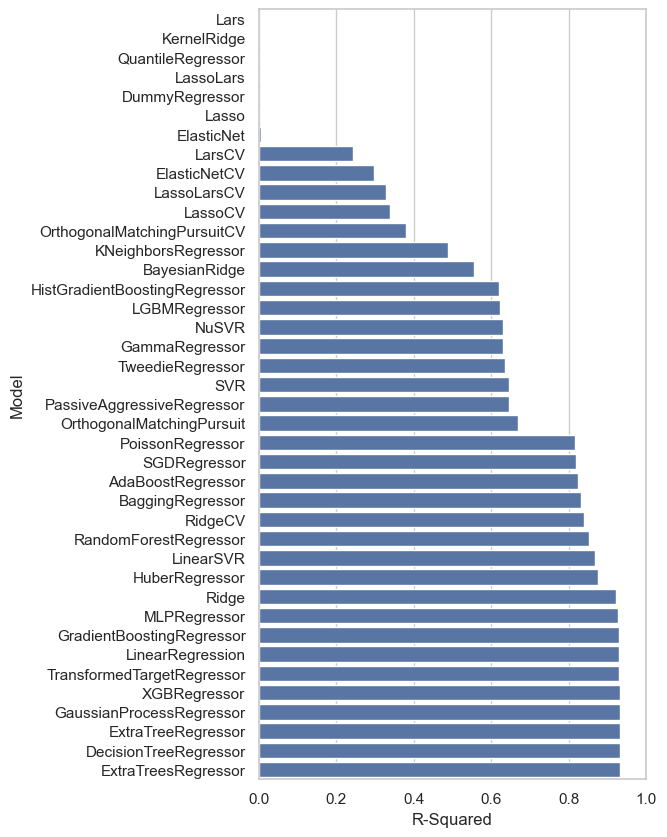

In [36]:
# Bar plot of R-squared values
import matplotlib.pyplot as plt
import seaborn as sns

#train["R-Squared"] = [0 if i < 0 else i for i in train.iloc[:,0] ]

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="R-Squared", data=predictions_train)
ax.set(xlim=(0, 1))

[(0.0, 10.0)]

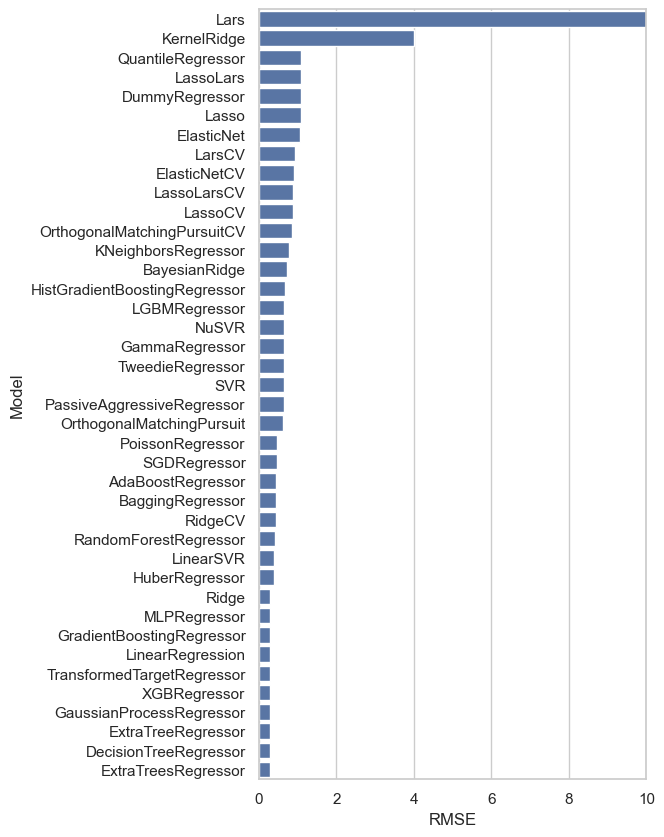

In [37]:
# Bar plot of RMSE values
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="RMSE", data=predictions_train)
ax.set(xlim=(0, 10))

[(0.0, 10.0)]

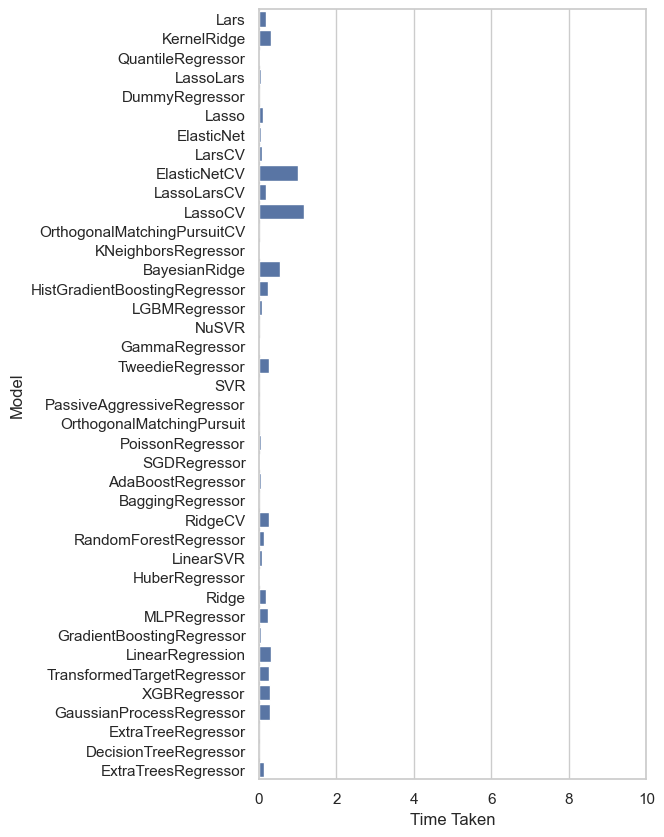

In [38]:
# Bar plot of calculation time
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="Time Taken", data=predictions_train)
ax.set(xlim=(0, 10))